## **Handwritten Digits Classification**

In this notebook, we'll use a basic neural network with just input and output layers to classify handwritten numbers. Next, we'll include a hidden layer and monitor any improvements in the model's performance.

Handwritten digit recognition is a classic problem in the field of computer vision and machine learning. The task involves classifying images of handwritten digits (0-9) into their respective categories. This project uses the CIFAR-10 dataset and the PyTorch deep learning framework to build and train a convolutional neural network (CNN) model for digit classification.

In [29]:
# Importing Libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The dataset cntains some images of handwritten digits from 0-9.The dataset is commonly used for machine learning and computer vision research.

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

The dataset contains 60000 images in train set and 10000 in test set.

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

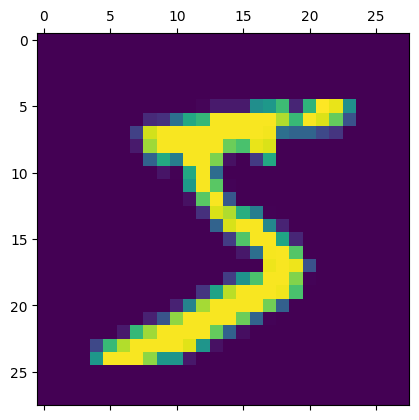

In [9]:
plt.matshow(x_train[0])

In [10]:
y_train[0]

5

In [11]:
#Normalizing the training data
x_train = x_train / 255
x_test = x_test / 255

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [15]:
x_train_flattened.shape

(60000, 784)

In [16]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**Neural Network with no hidden layer**

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

c:\Users\AYESHA QAMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [19]:
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8150 - loss: 0.7194
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9173 - loss: 0.3005
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9203 - loss: 0.2894
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9230 - loss: 0.2790
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9257 - loss: 0.2673


The accuracy we get in above 5 epochs is about 92%.

In [20]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9144 - loss: 0.3031


[0.26717880368232727, 0.925599992275238]

In [21]:
y_pred = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [22]:
y_pred[0]

array([2.2623241e-02, 2.2354519e-07, 4.6177682e-02, 9.3717480e-01,
       1.6367625e-03, 1.0656164e-01, 1.4726709e-06, 9.9973387e-01,
       9.0047792e-02, 6.2150264e-01], dtype=float32)

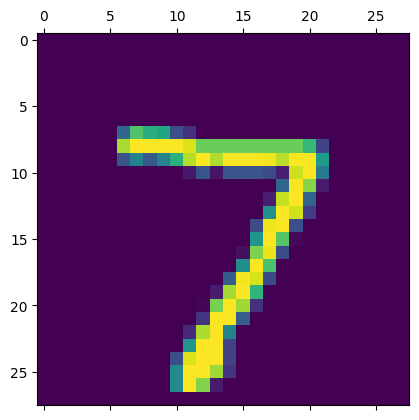

In [23]:
plt.matshow(x_test[0])

In [24]:
np.argmax(y_pred[0])

7

np.argmax finds a maximum element from an array and returns the index of it

In [26]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [27]:
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [28]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   8,    9,  918,   18,    6,    4,   13,   11,   40,    5],
       [   3,    0,   14,  922,    0,   27,    3,   11,   20,   10],
       [   1,    1,    6,    2,  899,    0,   11,    4,   11,   47],
       [  10,    2,    4,   26,    7,  789,   12,    6,   28,    8],
       [  14,    3,    6,    1,    7,   13,  910,    2,    2,    0],
       [   1,    5,   23,    6,    4,    0,    0,  948,    2,   39],
       [   9,    7,    7,   21,    9,   29,    9,   11,  863,    9],
       [  11,    7,    1,    8,   17,    7,    0,   22,    5,  931]])>

Text(95.72222222222221, 0.5, 'Actual')

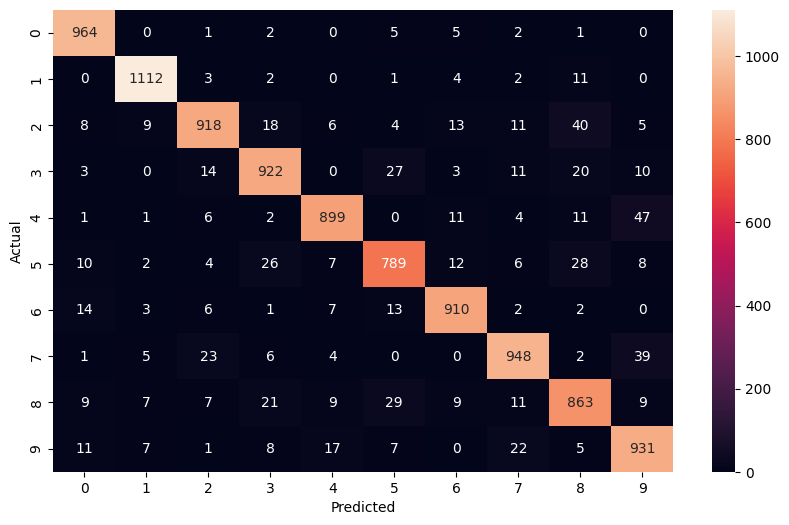

In [30]:
# Making heatmap visual
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

**Using Hidden Layer**

In [32]:
cnn = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

c:\Users\AYESHA QAMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
cnn.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8667 - loss: 0.4662
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9596 - loss: 0.1341
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9735 - loss: 0.0875
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9811 - loss: 0.0624
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9850 - loss: 0.0491


In [36]:
cnn.evaluate(x_test_flattened,  y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9707 - loss: 0.0892


[0.07707864046096802, 0.9751999974250793]

In [37]:
y_pred = cnn.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [38]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [39]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_test)

Text(95.72222222222221, 0.5, 'Actual')

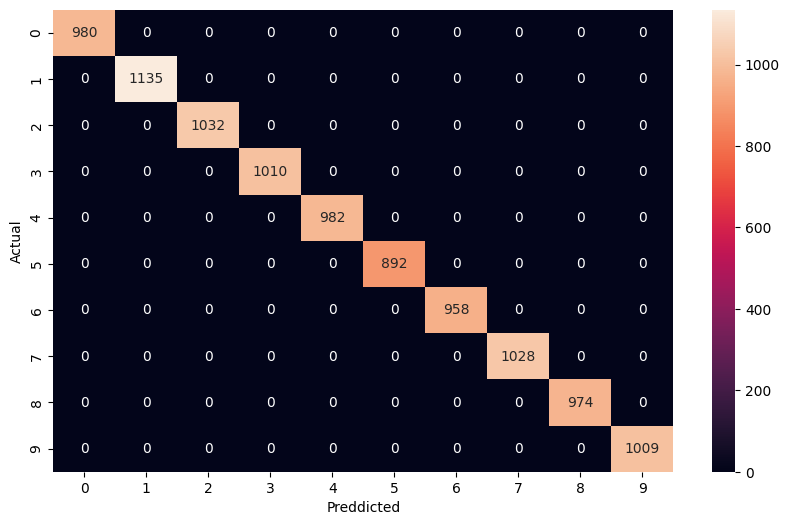

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Preddicted')
plt.ylabel('Actual')

**Using Flatten layer so that we don't have to call .reshape on input dataset**

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

c:\Users\AYESHA QAMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8744 - loss: 0.4510
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9602 - loss: 0.1362
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9719 - loss: 0.0917
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9804 - loss: 0.0626
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9845 - loss: 0.0492
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9879 - loss: 0.0393
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9903 - loss: 0.0322
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9921 - loss: 0.0257
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9945 - loss: 0.0198
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9950 - loss: 0.0162


In [44]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9730 - loss: 0.1007


[0.08431891351938248, 0.9767000079154968]

**Conclusion**

This project demonstrates the application of a CNN for handwritten digit classification using the CIFAR-10 dataset and Tensorflow. By following the steps of data preprocessing, model building, training, and evaluation, we achieve a robust model capable of accurately classifying handwritten digits. This project serves as a foundational example for understanding and implementing CNNs in the field of computer vision.